# Forward Propagation in the Neural Networks
## 융합공학부 디지털이미징전공 20175437 신준섭

## 1. Input data

In [17]:
import matplotlib.pyplot as plt
import numpy as np

file_path = "mnist_test.csv"

IMG_SZ_ROW, IMG_SZ_COL = 28, 28

images, labels = [], []
with open(file_path, "r") as file_hander:
    raw_data = file_hander.readlines()
    for line in raw_data:
        img = line.split(',')
        images.append([*map(lambda x: (float)(x),img[1:])])
        labels.append([int(img[0])])

images, labels = np.matrix(images), np.matrix(labels)
img_lab = np.concatenate((images, labels), axis=1)

## 2. Average Image for Each Digit

In [37]:
def computeAverage(imgs, labs):
    image_dict = {}

    for idx in range(10):
        image_dict[idx] = []

    for img_idx in range(imgs.shape[0]):
        image_dict[labs[img_idx].item()].append(imgs[img_idx])

    for num in image_dict:
        num_imgs = image_dict[num]
        image_dict[num] = np.concatenate(num_imgs, axis=0).sum(axis=0) / float(len(num_imgs))

    return image_dict

ave_images = computeAverage(images, labels)

for ave_lab in ave_images:
    ave_images[ave_lab] = ave_images[ave_lab].reshape((IMG_SZ_ROW, IMG_SZ_COL))

## 3. Forward Propagation with Random Weights

In [19]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-1.0 * z))

weights = np.transpose(np.matrix(np.random.normal(0, 1, IMG_SZ_ROW * IMG_SZ_COL)))

out_img = sigmoid(np.matmul(images, weights))


## Computing the output

In [23]:
ave_res = computeAverage(out_img, labels)

for lab in ave_res:
    ave_res[lab] = ave_res[lab].item(0)

# plt.bar(ave_res.keys(), ave_res.values())
# plt.show()

# Submission

## 1. Plot the average image

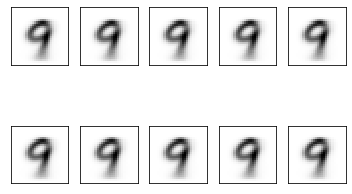

In [39]:
for ave_lab in ave_images:
    ave_mat = ave_images[ave_lab].reshape((IMG_SZ_ROW, IMG_SZ_COL))
    plt.subplot(2, 5, ave_lab + 1)
    plt.imshow(ave_mat, cmap='Greys', interpolation='None')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)